## Desafío Empresarial: Análisis de Ventas de Aguacates

En este ejercicio, abordarás un escenario empresarial real relacionado con las ventas de aguacates. Debido al notable aumento en el consumo de aguacates en los últimos años, una cadena de tiendas de comestibles regionales te ha contratado para extraer valiosas percepciones de sus datos de ventas. La tienda desea comprender las tendencias del mercado, las estrategias de precios y los factores que influyen en las ventas de aguacates, con el objetivo de tomar decisiones informadas para mejorar la rentabilidad.

### Introducción al Conjunto de Datos de Aguacate

El conjunto de datos que utilizarás contiene información sobre las ventas de aguacates en diferentes regiones de Estados Unidos, incluyendo detalles como la fecha de venta, el precio promedio, el volumen total vendido y la región.

**Tu Misión:** Utilizando Pandas, realiza un análisis exhaustivo para responder preguntas críticas de negocio. A continuación, se presentan las tareas que deberás cumplir:

### Tareas:

1. **Carga de Datos:** Carga el conjunto de datos de aguacates (`avocado.csv`) en un DataFrame de Pandas y asegúrate de que los datos se han cargado correctamente. Utiliza `info()` para revisar la estructura y los tipos de datos del conjunto.

2. **Exploración de Datos:** Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo el número de filas y columnas, tipos de datos y valores faltantes. Imprime la cantidad de valores faltantes por columna utilizando `isnull()`.

3. **Análisis de Series de Tiempo:** Examina las ventas de aguacates a lo largo del tiempo. Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.

4. **Análisis Regional:** Identifica las regiones con mejor rendimiento en términos de volumen de ventas y precios promedio. Esto te permitirá focalizar tus esfuerzos de marketing en áreas clave. Utiliza `groupby()` y `nlargest()` para obtener los resultados.

5. **Tendencias de Precios y Volumen:** Analiza cómo los cambios en los precios de los aguacates afectan el volumen de ventas mediante visualizaciones que ilustren esta relación.

6. **Elasticidad del Precio:** Calcula la elasticidad precio de la demanda para entender cuán sensibles son las ventas a los cambios de precio. Esto se puede hacer analizando las variaciones porcentuales de precio y volumen.

7. **Matriz de Correlación:** Selecciona solo las columnas numéricas del DataFrame y calcula la matriz de correlación para identificar relaciones significativas entre las variables. Utiliza un mapa de calor para visualizar esta correlación de manera efectiva.

8. **Recomendaciones:** Basado en tus hallazgos, proporciona recomendaciones prácticas a la cadena de tiendas de comestibles. Esto puede incluir estrategias de precios, enfoques de marketing y análisis de tendencias estacionales.

### Para Empezar:

Carga el conjunto de datos de aguacates y comienza tu exploración de datos. Utiliza Pandas para la limpieza, visualización y análisis. A medida que avances, documenta tus hallazgos e insights para presentarlos a la gerencia.

Recuerda que Pandas es una herramienta poderosa que puede ayudar a las empresas a tomar decisiones basadas en datos. Este ejercicio te brindará experiencia práctica en análisis de datos y destacará los valiosos insights que se pueden obtener del mundo real.

¡Sumérgete en el mundo de las ventas de aguacates y comienza a formular recomendaciones basadas en datos para impulsar la rentabilidad!


In [2]:
!pip install pandas seaborn matplotlib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



1. **Carga de Datos:** Carga el conjunto de datos de aguacates (`avocado.csv`) en un DataFrame de Pandas y asegúrate de que los datos se han cargado correctamente. Utiliza `info()` para revisar la estructura y los tipos de datos del conjunto.




In [3]:
# Carga el conjunto de datos de aguacates
avocado = pd.read_csv("avocado.csv")

avocado.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
print(avocado.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None


In [5]:

# cantidad de datos distintos de cada columna
avocado.nunique()


Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [6]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


2. **Exploración de Datos:** Realiza un análisis exploratorio para entender la estructura del conjunto, incluyendo el número de filas y columnas, tipos de datos y valores faltantes. Imprime la cantidad de valores faltantes por columna utilizando `isnull()`.



Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


<Axes: >

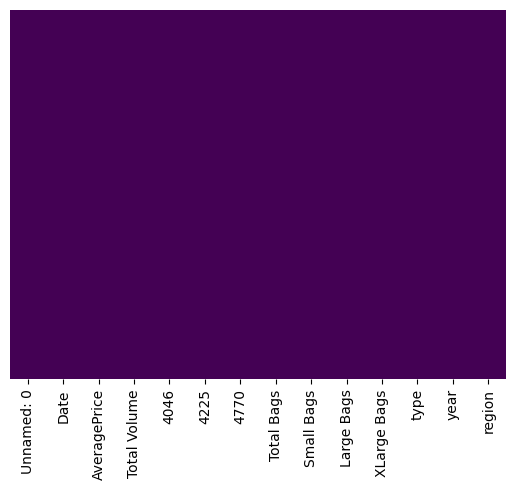

In [7]:
# grafica de distribucion de nulos para cada columna

# cantidad de nulos de cada columna
print(avocado.isnull().sum())
sns.heatmap(avocado.isnull(), yticklabels=False, cbar=False, cmap='viridis')


3. **Análisis de Series de Tiempo:** Examina las ventas de aguacates a lo largo del tiempo. Convierte la columna de fecha a un formato adecuado y agrupa los datos mensuales para visualizar las tendencias de ventas en un gráfico.



<Axes: xlabel='Date'>

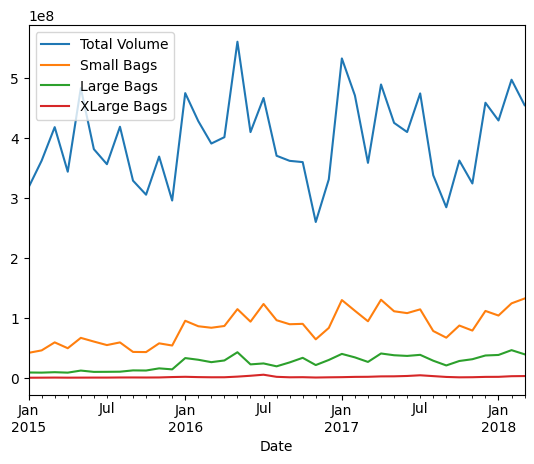

In [26]:
# convierte la columna de fecha a un formato adecuado
avocado["Date"] = pd.to_datetime(avocado["Date"])

# agrupar Total Volume por mes de Date y mostrar en un histograma
monthly_volumes = avocado.groupby(avocado.Date.dt.to_period("M"))["Total Volume"].sum()
monthly_volumes.plot(legend = True)
avocado.groupby(avocado.Date.dt.to_period("M"))["Small Bags"].sum().plot(legend = True)
avocado.groupby(avocado.Date.dt.to_period("M"))["Large Bags"].sum().plot(legend = True)
avocado.groupby(avocado.Date.dt.to_period("M"))["XLarge Bags"].sum().plot(legend = True)
# avocado.set_index("Date").groupby(pd.Grouper(freq="ME")).sum()["Total Volume"].plot()

4. **Análisis Regional:** Identifica las regiones con mejor rendimiento en términos de volumen de ventas y precios promedio. Esto te permitirá focalizar tus esfuerzos de marketing en áreas clave. Utiliza `groupby()` y `nlargest()` para obtener los resultados.



region
TotalUS         5.864740e+09
West            1.086779e+09
California      1.028982e+09
SouthCentral    1.011280e+09
Northeast       7.132809e+08
Name: Total Volume, dtype: float64


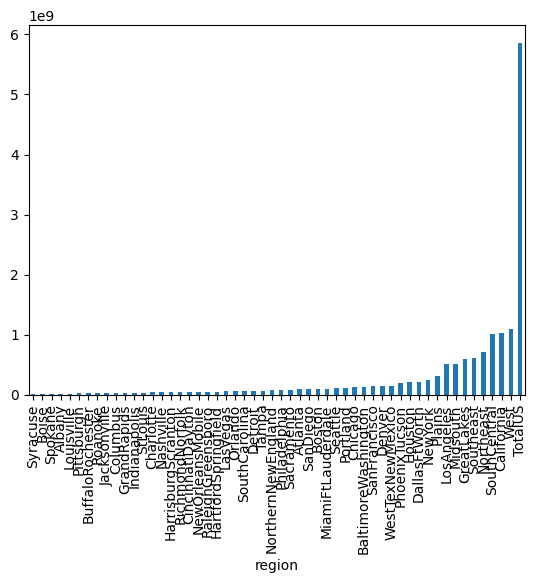

In [36]:

# agrupar Total Volume por region y mostrar en un histograma
avocado.groupby("region")["Total Volume"].sum().sort_values().plot(kind="bar")

#utiliza nlargest() para mostrar las regiones con más volumen
print(avocado.groupby("region")["Total Volume"].sum().nlargest(5))

Total US:  5864740181.799999 Total Non US:  9658662411.599998  Diference:  -3793922229.799999


<Axes: xlabel='region'>

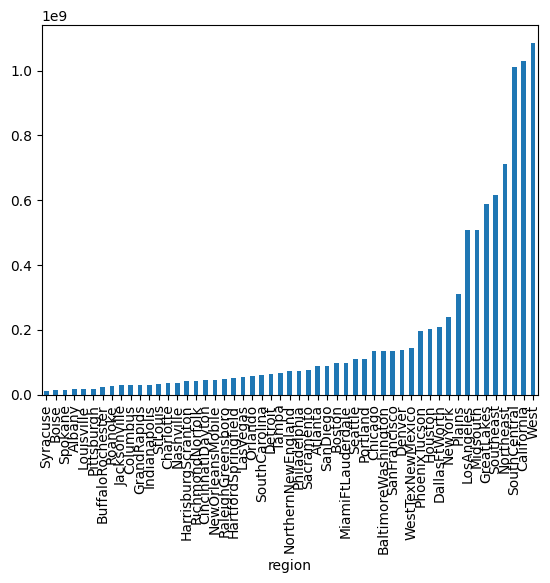

In [38]:
totalUS = avocado[avocado.region == "TotalUS"]["Total Volume"].sum()
avocadoNonTotalUS = avocado[avocado.region != "TotalUS"]
totalNonUS = avocadoNonTotalUS["Total Volume"].sum()
diference = totalUS - totalNonUS

print("Total US: ", totalUS, "Total Non US: ", totalNonUS, " Diference: ", diference)

avocadoNonTotalUS.groupby("region")["Total Volume"].sum().sort_values().plot(kind="bar")


5. **Tendencias de Precios y Volumen:** Analiza cómo los cambios en los precios de los aguacates afectan el volumen de ventas mediante visualizaciones que ilustren esta relación.



<Axes: xlabel='Date'>

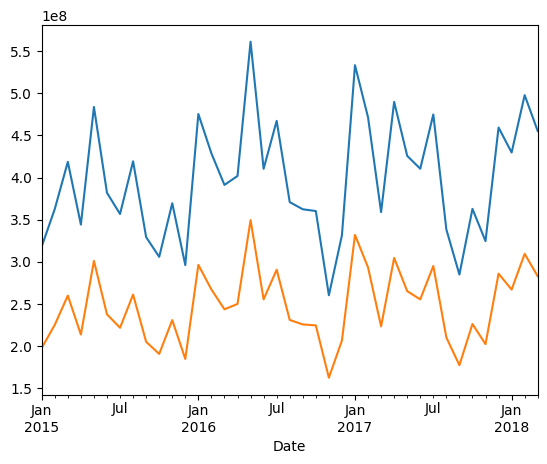

In [50]:
# muestra solo los campos "Date",  "AveragePrice", "Total Volume"

volumes = avocado.groupby(avocado.Date.dt.to_period("M"))["Total Volume"].sum()
volumesNonTotalUS = avocadoNonTotalUS.groupby(avocado.Date.dt.to_period("M"))["Total Volume"].sum()
volumes.plot()
volumesNonTotalUS.plot()


<Axes: xlabel='Date'>

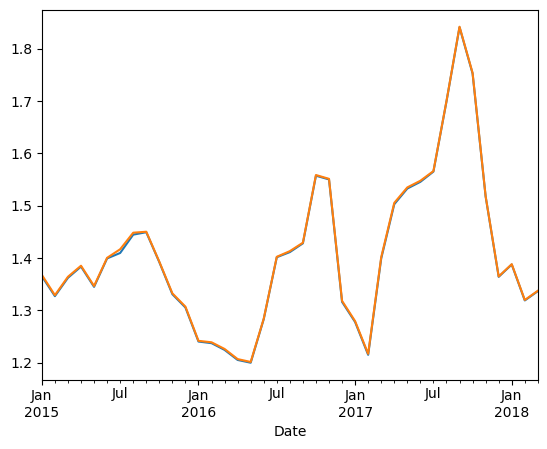

In [49]:
prices = avocado.groupby(avocado.Date.dt.to_period("M"))["AveragePrice"].mean()
pricesNonTotalUS = avocadoNonTotalUS.groupby(avocado.Date.dt.to_period("M"))["AveragePrice"].mean()
prices.plot()
pricesNonTotalUS.plot()

# No se observan diferencias entre los valores medios de precios de los dos grupos

<Axes: xlabel='Date'>

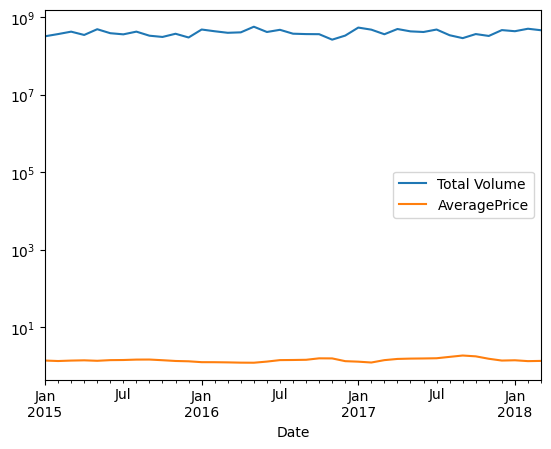

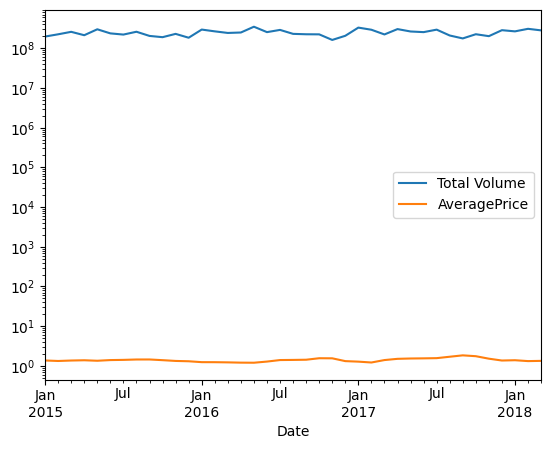

In [54]:
result = pd.merge(volumes, prices, left_index=True, right_index=True)
result.plot(logy=True)
resultNonTotalUS = pd.merge(volumesNonTotalUS, pricesNonTotalUS, left_index=True, right_index=True)
resultNonTotalUS.plot(logy=True)

<Axes: >

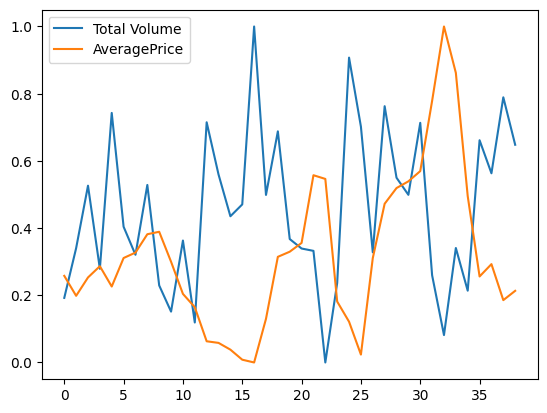

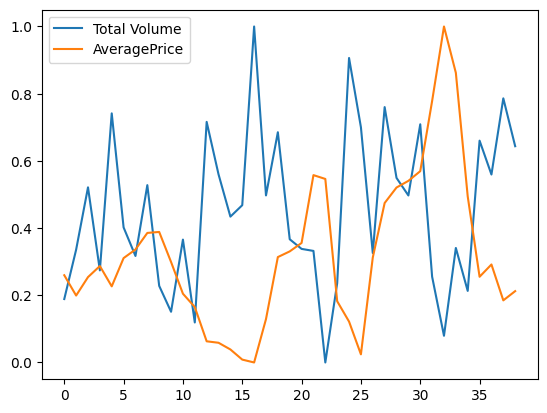

In [57]:
!pip install -U scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Normalizar el DataFrame
df_normalizado = pd.DataFrame(MinMaxScaler().fit_transform(result), columns=result.columns)
df_normalizado.plot()

df_normalizadoNonTotalUS = pd.DataFrame(MinMaxScaler().fit_transform(resultNonTotalUS), columns=resultNonTotalUS.columns)
df_normalizadoNonTotalUS.plot()

# No se observan diferencias entre los graficos

6. **Elasticidad del Precio:** Calcula la elasticidad precio de la demanda para entender cuán sensibles son las ventas a los cambios de precio. Esto se puede hacer analizando las variaciones porcentuales de precio y volumen.


<Axes: xlabel='Date'>

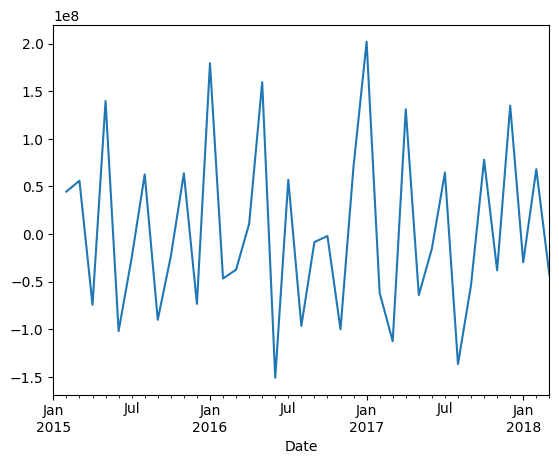

In [13]:
volumes_diff = volumes.diff()
volumes_diff.plot()


<Axes: xlabel='Date'>

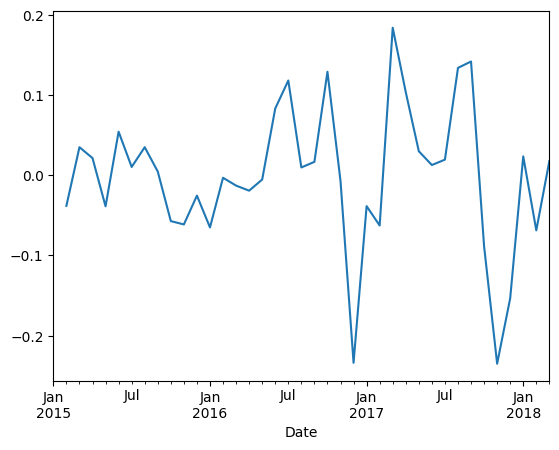

In [14]:
prices_diff = prices.diff()
prices_diff.plot()

<Axes: xlabel='Date'>

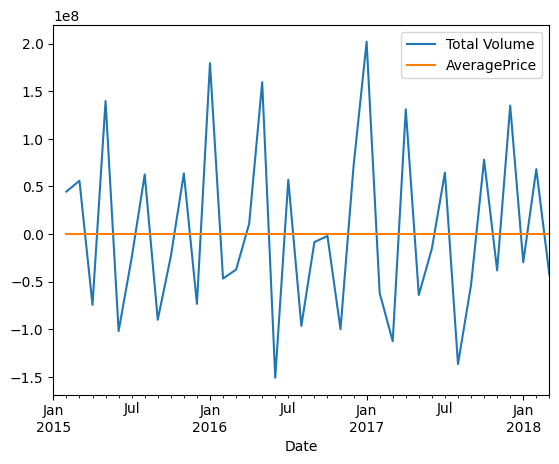

In [56]:
res_diff = pd.merge(volumes_diff, prices_diff, left_index=True, right_index=True)
res_diff.plot()
# no se pueden comparar debido al orden , es necesario normalizar

<Axes: >

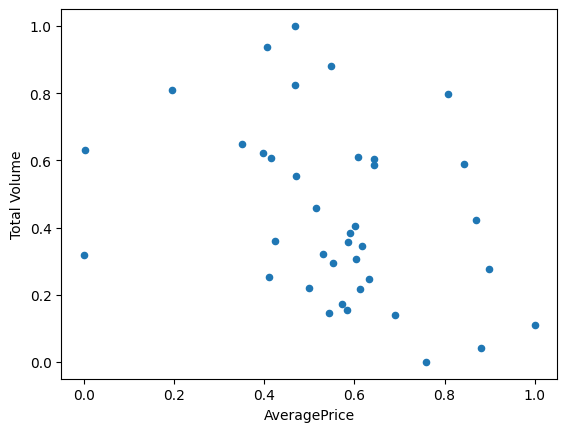

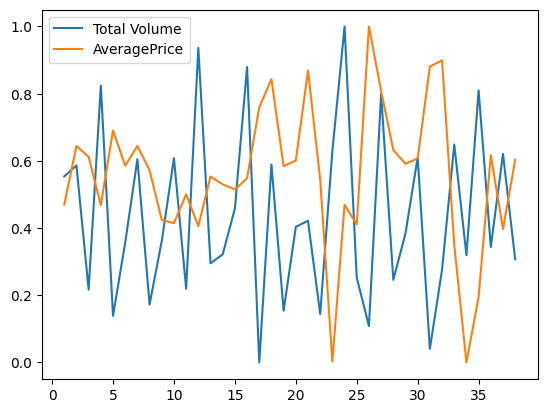

In [81]:
result_diff = pd.merge(volumes_diff, prices_diff, left_index=True, right_index=True)

result_diff_norm = pd.DataFrame(MinMaxScaler().fit_transform(result_diff), columns=result_diff.columns)
# 'line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin'
result_diff_norm.plot(kind="scatter", x="AveragePrice", y="Total Volume")
result_diff_norm.plot()


7. **Matriz de Correlación:** Selecciona solo las columnas numéricas del DataFrame y calcula la matriz de correlación para identificar relaciones significativas entre las variables. Utiliza un mapa de calor para visualizar esta correlación de manera efectiva.



<Axes: >

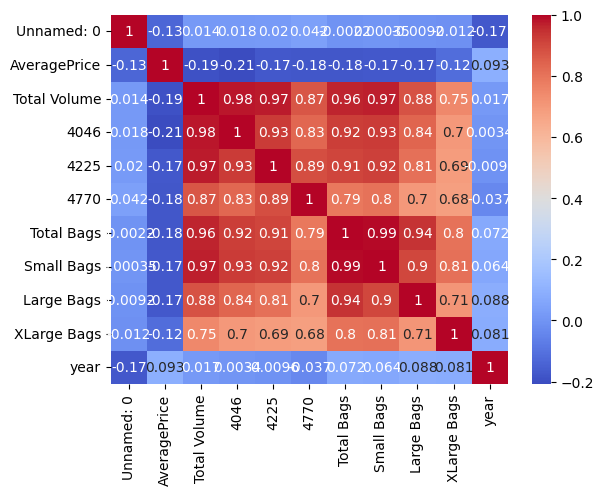

In [16]:
sns.heatmap(avocado.drop(columns=['Date', 'type', 'region']).corr(), cmap='coolwarm', annot=True)


8. **Recomendaciones:** Basado en tus hallazgos, proporciona recomendaciones prácticas a la cadena de tiendas de comestibles. Esto puede incluir estrategias de precios, enfoques de marketing y análisis de tendencias estacionales.


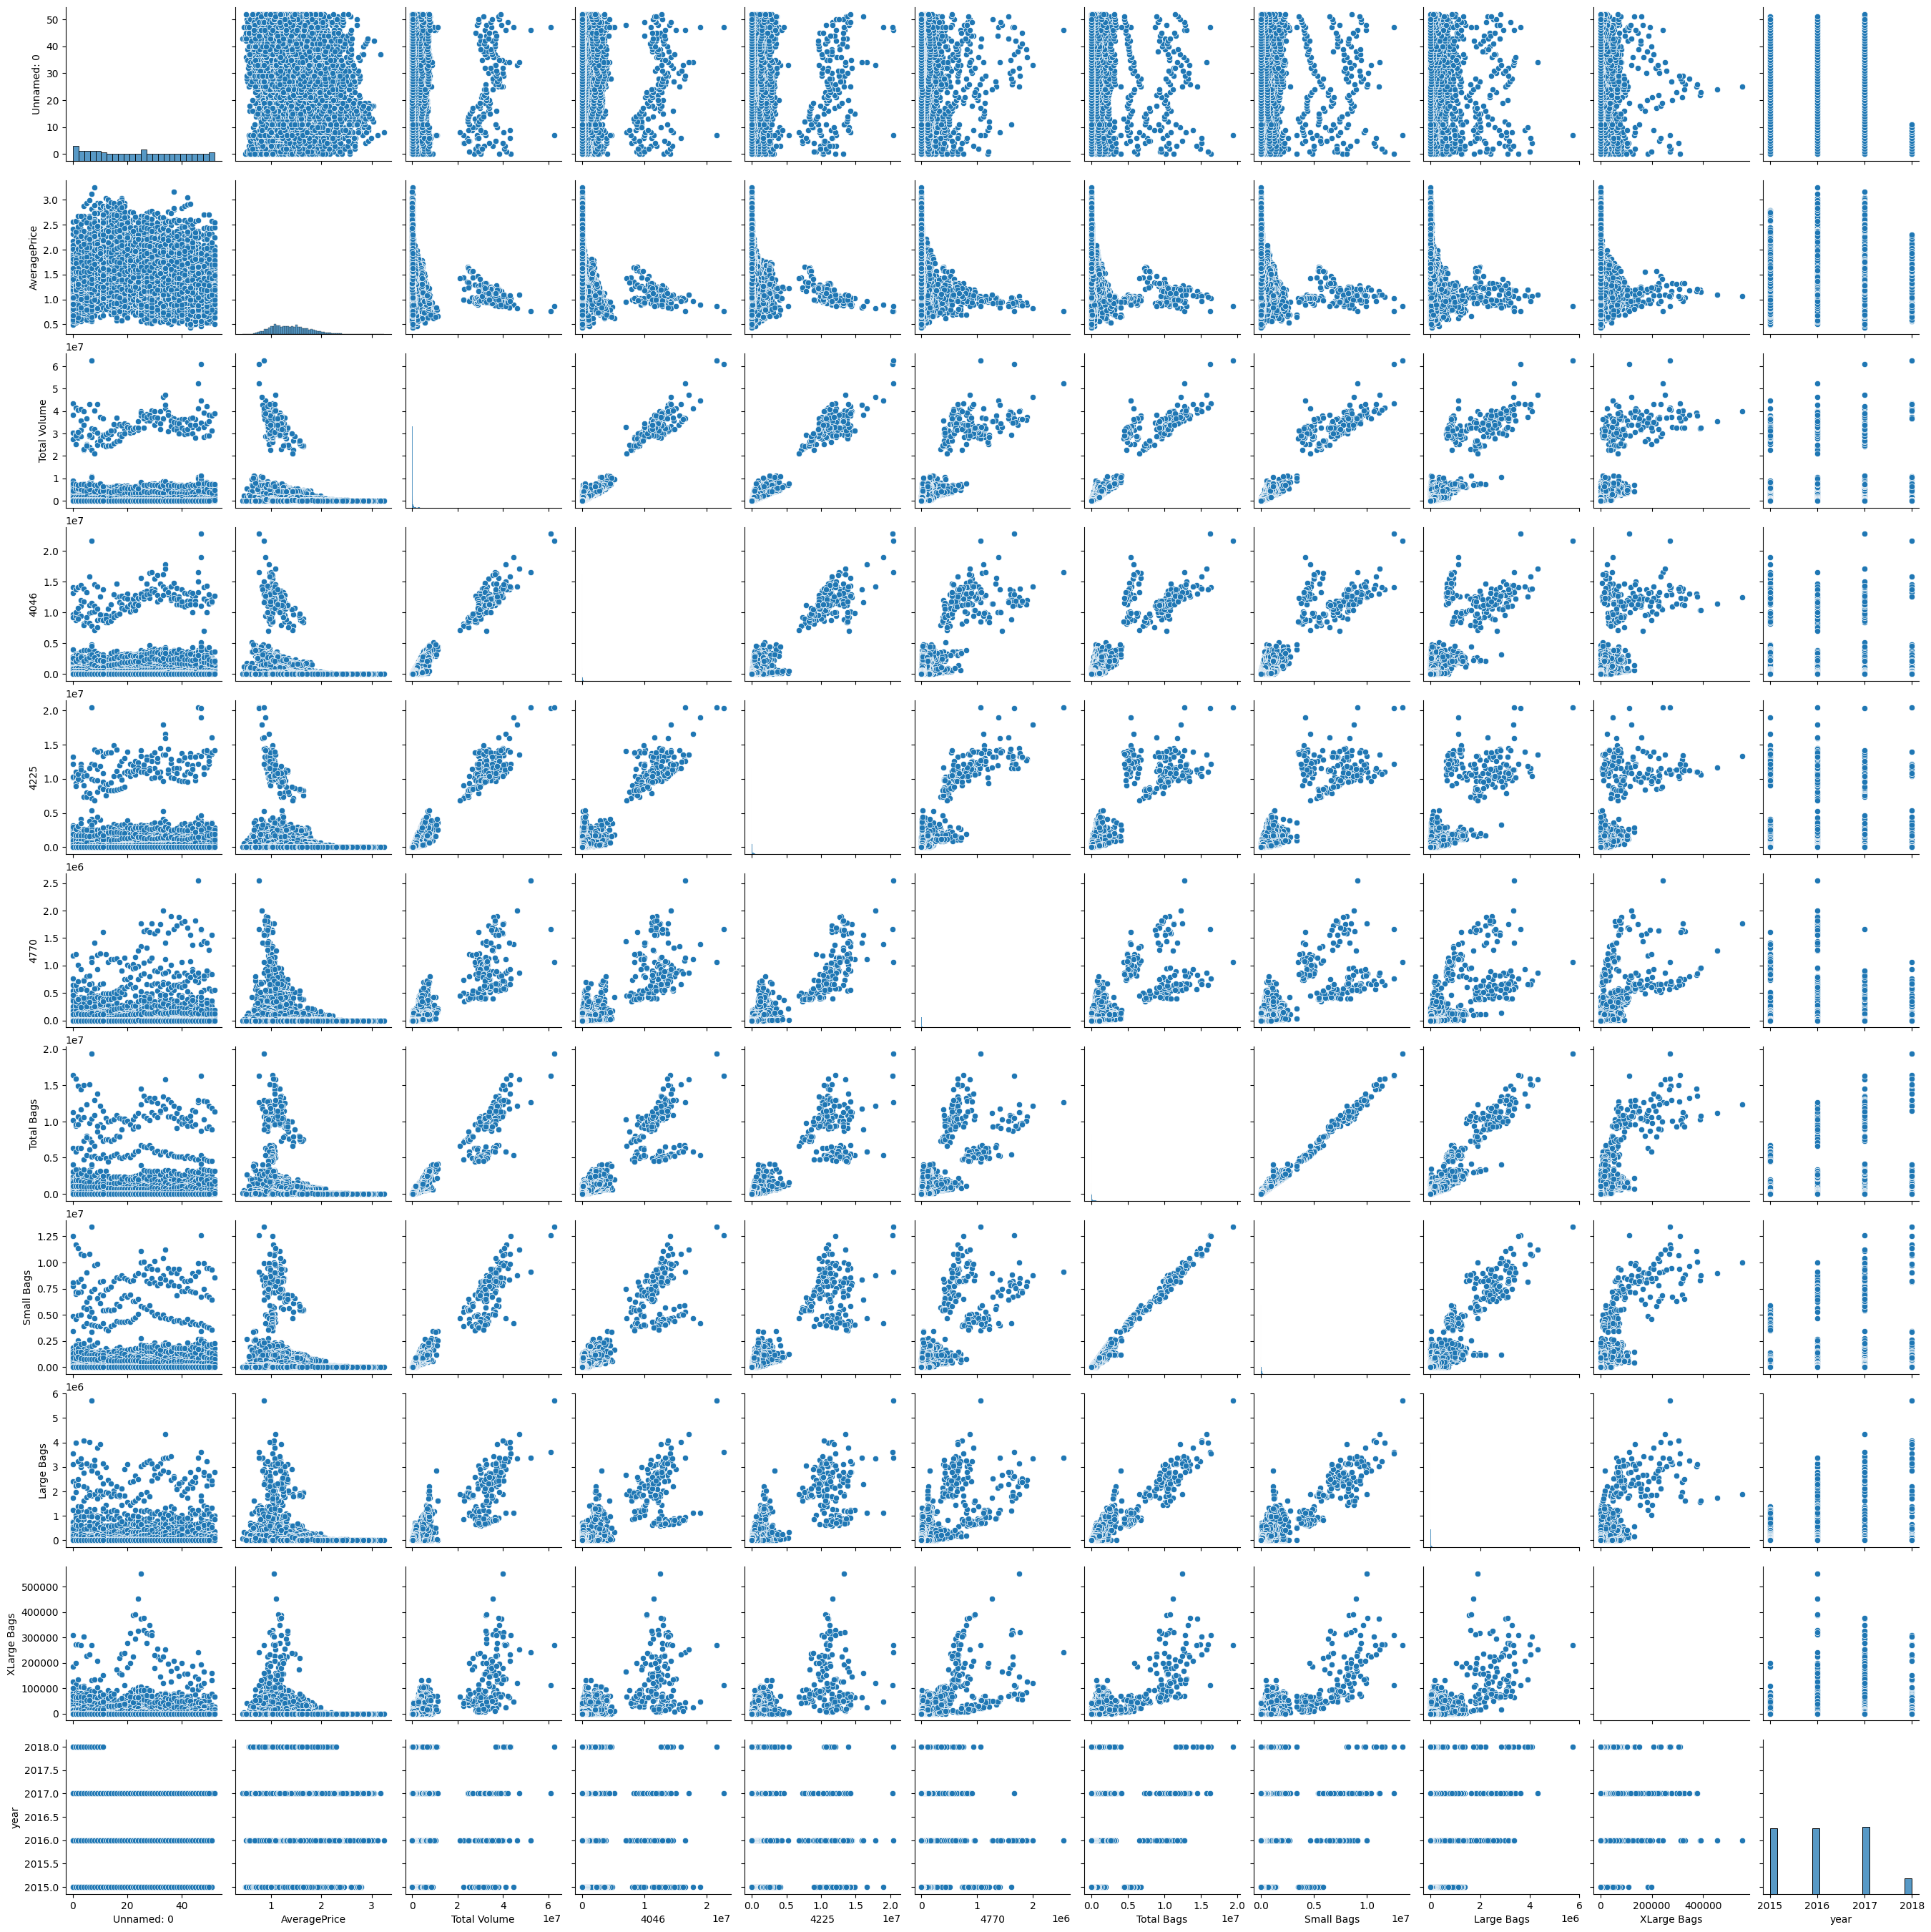

In [17]:
# Ignorar columnas calculadas que provocan una alta correlacion

sns.pairplot(avocado.drop(columns=['Date', 'type', 'region']))